<a href="https://colab.research.google.com/github/Suchith19792/MachineLearning-Samples/blob/master/LoveHolidays_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal

**Load Data**

In [ ]:
print(os.listdir())

['.config', 'pageview_data_bookers.csv', 'drive', 'marketing_channel_timeseries.csv', 'sample_data']


In [ ]:
mct = pd.read_csv('marketing_channel_timeseries.csv')
pdb = pd.read_csv('pageview_data_bookers.csv')

**Explore data**

In [ ]:
mct.head()

,date_week,isMobile,source,medium,referralPath,region,visits,bounces,transactions,totalTransactionRevenue
0,2017-06-25,False,google,organic,NaN,California,24,4,1,15990000
1,2017-06-25,True,google,organic,NaN,California,37,15,0,0
2,2017-06-25,True,google,organic,NaN,Texas,12,6,0,0
3,2017-06-25,False,google,organic,NaN,New York,9,2,0,0
4,2017-06-25,False,(direct),(none),NaN,not available in demo dataset,32,10,0,0


In [ ]:
pdb.head()

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber,pagePath
0,6.911334e+15,NaN,1,1500268117,1,1,/home
1,6.911334e+15,NaN,1,1500268117,1,2,/home
2,6.911334e+15,NaN,1,1500268117,1,3,/home
3,6.911334e+15,NaN,1,1500268117,1,4,/google+redesign/apparel/mens+outerwear/androi...
4,6.911334e+15,NaN,1,1500268117,1,5,/google+redesign/apparel/women+s+google+yoga+j...


In [ ]:
mct.info()
#only referralPath has some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date_week                1737 non-null   object
 1   isMobile                 1737 non-null   bool  
 2   source                   1737 non-null   object
 3   medium                   1737 non-null   object
 4   referralPath             1014 non-null   object
 5   region                   1737 non-null   object
 6   visits                   1737 non-null   int64 
 7   bounces                  1737 non-null   int64 
 8   transactions             1737 non-null   int64 
 9   totalTransactionRevenue  1737 non-null   int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 124.0+ KB


In [ ]:
mct.describe()

,visits,bounces,transactions,totalTransactionRevenue
count,1737.000000,1737.000000,1737.000000,1.737000e+03
mean,18.812320,7.453080,0.592401,8.893287e+07
std,87.726188,34.395976,3.573409,8.465157e+08
min,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,0.000000,0.000000e+00
75%,6.000000,3.000000,0.000000,0.000000e+00
max,1087.000000,517.000000,71.000000,2.726648e+10


In [ ]:
pdb.info()
# 'transactions' has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36165 entries, 0 to 36164
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fullVisitorId               36165 non-null  float64
 1   transactions                25534 non-null  float64
 2   total_visitor_transactions  36165 non-null  int64  
 3   visitId                     36165 non-null  int64  
 4   visitNumber                 36165 non-null  int64  
 5   hitNumber                   36165 non-null  int64  
 6   pagePath                    36165 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.9+ MB


In [ ]:
pdb.describe()

,fullVisitorId,transactions,total_visitor_transactions,visitId,visitNumber,hitNumber
count,3.616500e+04,25534.000000,36165.000000,3.616500e+04,36165.000000,36165.000000
mean,4.460565e+18,1.069045,1.321195,1.500381e+09,4.346993,21.738255
std,3.114752e+18,0.324177,1.060380,6.832974e+05,8.836883,23.502751
min,6.911334e+15,1.000000,1.000000,1.498893e+09,1.000000,1.000000
25%,1.459361e+18,1.000000,1.000000,1.499876e+09,1.000000,6.000000
50%,4.284747e+18,1.000000,1.000000,1.500396e+09,2.000000,15.000000
75%,7.211075e+18,1.000000,1.000000,1.500962e+09,4.000000,29.000000
max,9.974352e+18,4.000000,9.000000,1.501567e+09,135.000000,259.000000


**Q1 - Which marketing source delivers the most bookings?**

Source with max bookings of 665: (direct)


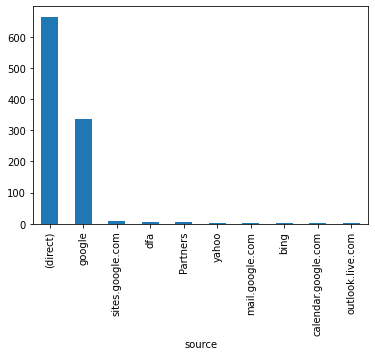

In [ ]:
# Assumption: Transactions corresponds to bookings
q1 = mct.groupby('source')['transactions'].sum().sort_values(ascending=False)
q1.head(10).plot(kind='bar')
print(f'Source with max bookings of {q1.max()}: {q1.idxmax()}')


Q1 Ans: Source with max bookings of 665: **(direct)**

 **Q2. How does bounce rate vary by marketing channel (source & medium)? Are the
differences significant?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


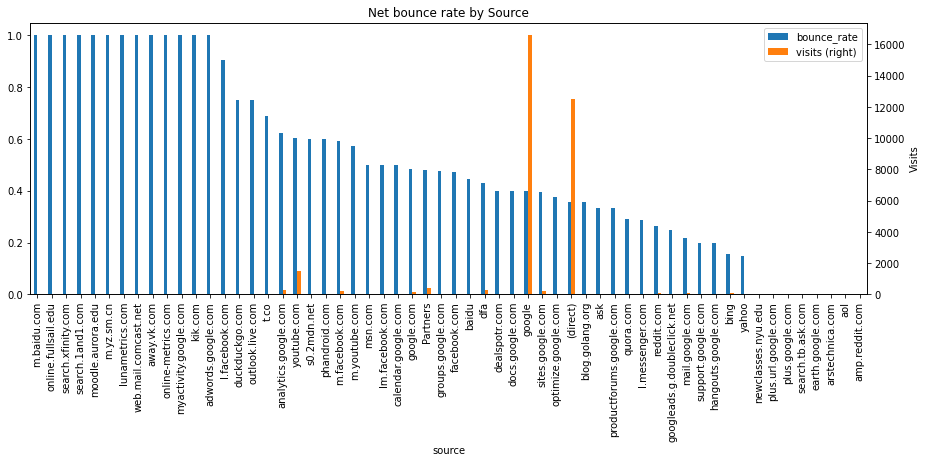

In [ ]:
Q2a = mct.groupby('source')['bounces','visits'].sum().sort_values(ascending=False,by='visits')
Q2a['bounce_rate'] = Q2a['bounces']/Q2a['visits']
Q2a[['bounce_rate','visits']].sort_values(ascending=False,by='bounce_rate').plot(kind='bar',secondary_y='visits',figsize=(15,5));
plt.ylabel('Visits')
plt.title('Net bounce rate by Source');
# q2a.plot(x='source',y=['bounce_rate','visits'],kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


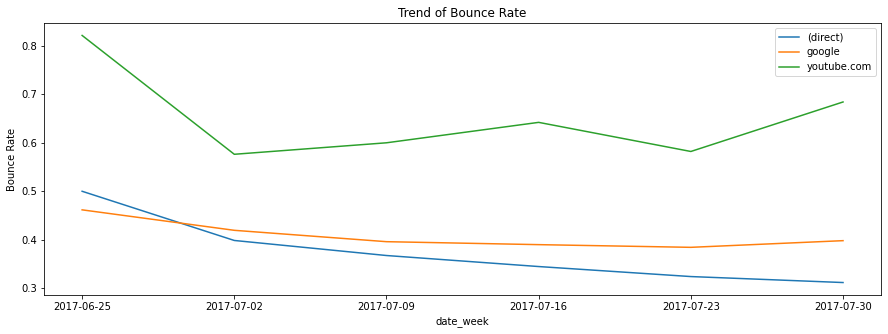

In [ ]:
Q2a1 = mct[mct.source.isin(['(direct)','google','youtube.com'])].groupby(['source','date_week'])['bounces','visits'].sum()
# Q2a1.plot(kind='line',secondary_y='visits',figsize=(12,5));
Q2a1['bounce_rate'] = Q2a1['bounces']/Q2a1['visits']
# Q2a1.reset_index(level=0)
Q2a1.reset_index(level='source',inplace=True)
Q2a1.groupby('source').bounce_rate.plot(kind='line',figsize=(15,5),legend=True)
plt.ylabel('Bounce Rate')
plt.title('Trend of Bounce Rate');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


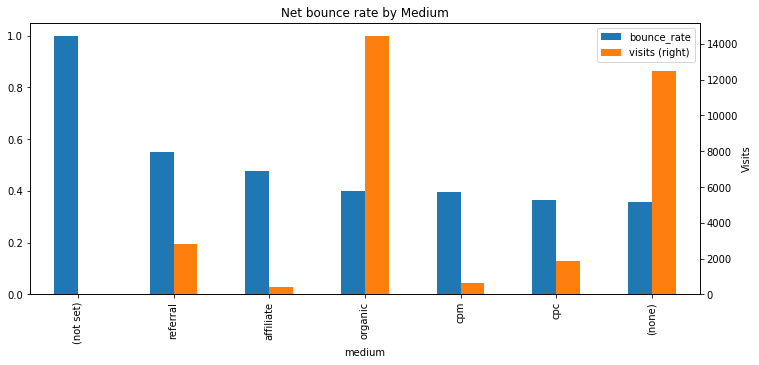

In [ ]:
Q2b = mct.groupby('medium')['bounces','visits'].sum().sort_values(ascending=False,by='visits')
Q2b['bounce_rate'] = Q2b['bounces']/Q2b['visits']
Q2b[['bounce_rate','visits']].sort_values(ascending=False,by='bounce_rate').plot(kind='bar',secondary_y='visits',figsize=(12,5));
plt.ylabel('Visits')
plt.title('Net bounce rate by Medium');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


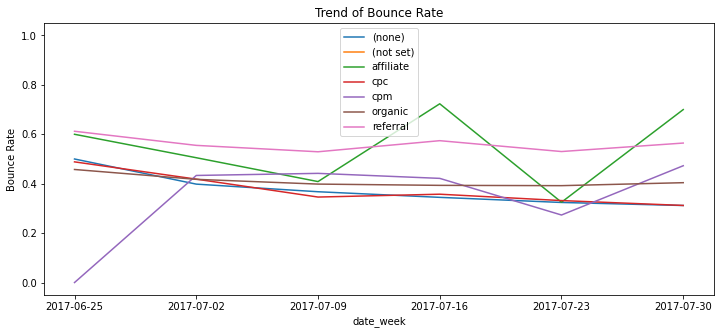

In [ ]:
Q2b1 = mct.groupby(['medium','date_week'])['bounces','visits'].sum()
# Q2a1.plot(kind='line',secondary_y='visits',figsize=(12,5));
Q2b1['bounce_rate'] = Q2b1['bounces']/Q2b1['visits']
# Q2a1.reset_index(level=0)
Q2b1.reset_index(level='medium',inplace=True)
Q2b1.groupby('medium').bounce_rate.plot(kind='line',figsize=(12,5),legend=True);
plt.ylabel('Bounce Rate')
plt.title('Trend of Bounce Rate');

**Q3 Which factors most strongly influence conversion rate (transactions / visit)**

In [ ]:
mct['conv_rate'] = mct['transactions']/mct['visits']
mct['bounce_rate'] = mct['bounces']/mct['visits']
print(mct.columns)

Index(['date_week', 'isMobile', 'source', 'medium', 'referralPath', 'region',
       'visits', 'bounces', 'transactions', 'totalTransactionRevenue',
       'conv_rate', 'bounce_rate'],
      dtype='object')


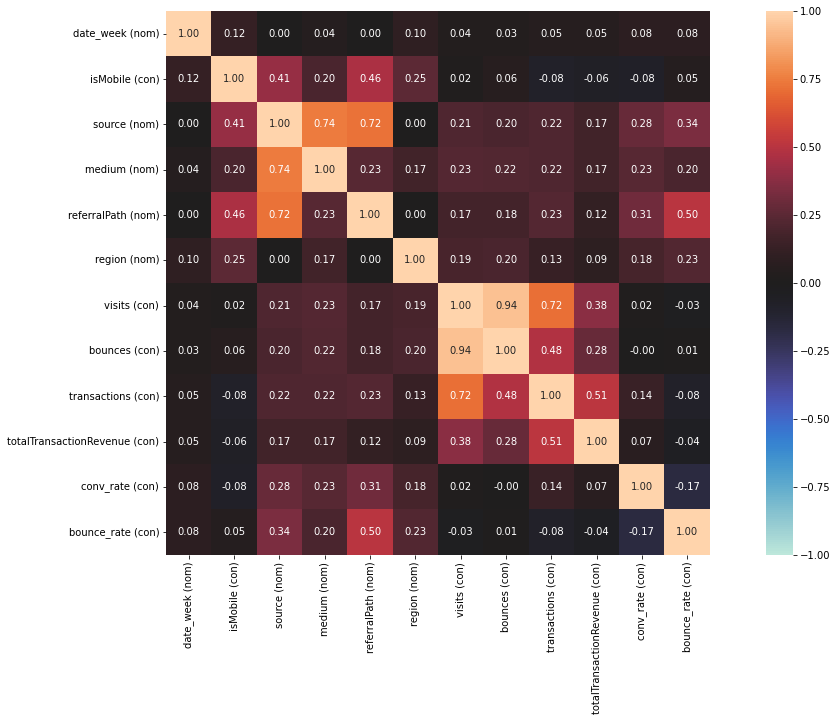

In [ ]:
nominal.associations(mct,figsize=(20,10),mark_columns=True);

Q3 Ans: The above heatmap shows that the conversion rate has highest correlation with 'Source', 'Medium', and 'referralPath'. Hence, these variable are likely to be highly influencial factors to conversion rate

**Q4. How complex are the paths a user takes to make a booking?**

In [ ]:
# Assumption: In the pdb table, "Transactions" is not null implies there is a booking made in the visit

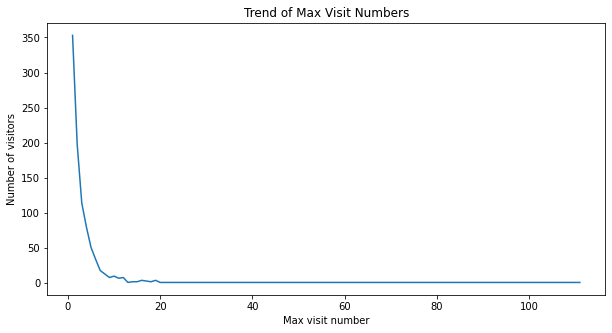

In [ ]:
MaxVisitNumPerVisitor = pdb[pdb.transactions.notnull()].groupby('fullVisitorId')['visitNumber'].max()
plt.figure(figsize=(10,5))
MaxVisitNumPerVisitor.value_counts().sort_index().plot(kind='line')
plt.title('Trend of Max Visit Numbers')
plt.xlabel('Max visit number')
plt.ylabel('Number of visitors');

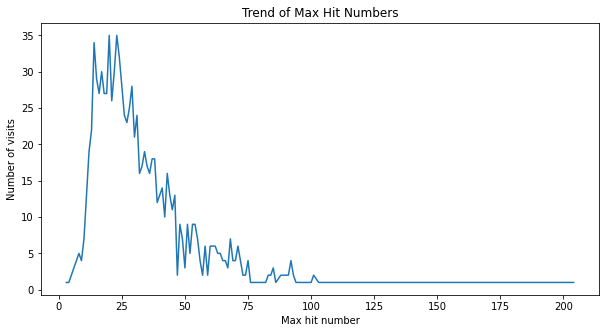

In [ ]:
MaxHitNumPerVisit = pdb[pdb.transactions.notnull()].groupby('visitId')['hitNumber'].max()
plt.figure(figsize=(10,5))
MaxHitNumPerVisit.value_counts().sort_index().plot(kind='line')
plt.title('Trend of Max Hit Numbers')
plt.xlabel('Max hit number')
plt.ylabel('Number of visits');

**Q5 What appears to be the biggest opportunity to drive incremental bookings?**

In [ ]:
Q5a = mct.groupby('region')['bounces','visits','transactions','totalTransactionRevenue'].sum().sort_values(ascending=False,by='visits')
Q5a['bounce_rate'] = Q5a['bounces']/Q5a['visits']
Q5a['conv_rate'] = Q5a['transactions']/Q5a['visits']
Q5a['spend_rate'] = Q5a['totalTransactionRevenue']/Q5a['transactions']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


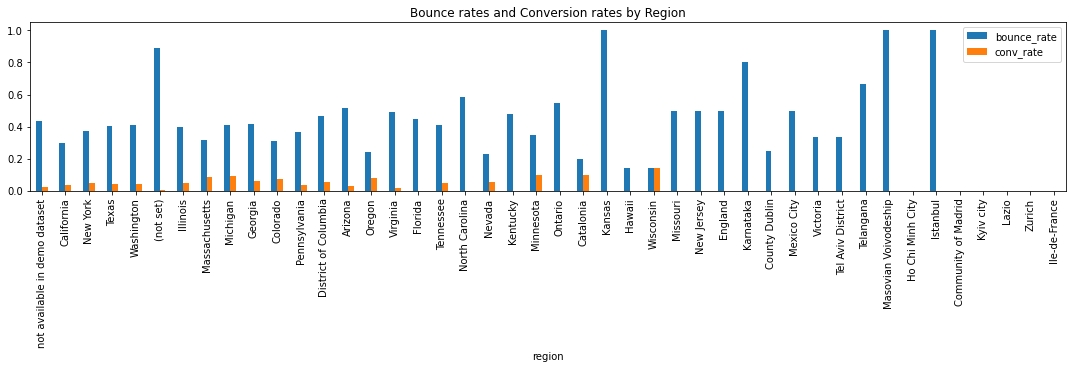

In [ ]:
Q5[['bounce_rate','conv_rate']].plot(kind='bar',figsize=(15,5));
plt.tight_layout();
plt.title('Bounce rates and Conversion rates by Region');

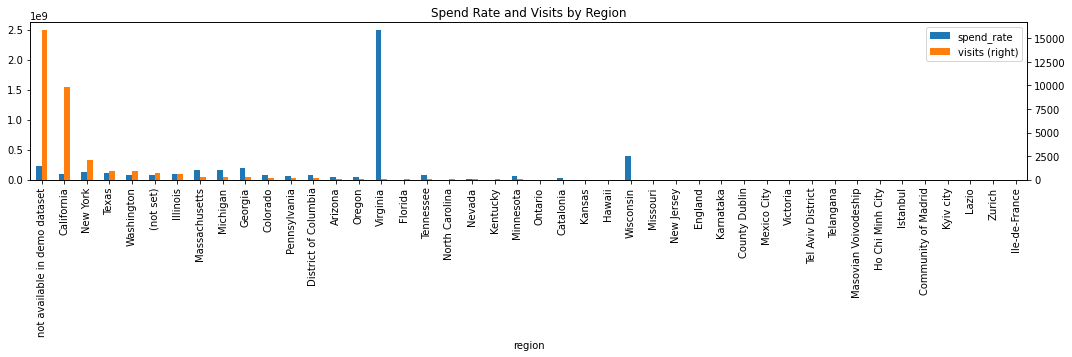

In [ ]:
Q5[['spend_rate','visits']].plot(kind='bar',secondary_y='visits',figsize=(15,5));
plt.tight_layout()
plt.title('Spend Rate and Visits by Region');

In [ ]:
Q5b = mct.groupby('medium')['bounces','visits','transactions','totalTransactionRevenue'].sum().sort_values(ascending=False,by='visits')
Q5b['bounce_rate'] = Q5b['bounces']/Q5b['visits']
Q5b['conv_rate'] = Q5b['transactions']/Q5b['visits']
Q5b['spend_rate'] = Q5b['totalTransactionRevenue']/Q5b['transactions']
Q5b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,bounces,visits,transactions,totalTransactionRevenue,bounce_rate,conv_rate,spend_rate
medium,,,,,,,
organic,5800,14464,278,25725180000,0.400996,0.019220,9.253662e+07
(none),4460,12486,665,121966250000,0.357200,0.053260,1.834079e+08
referral,1561,2829,14,779300000,0.551785,0.004949,5.566429e+07
cpc,677,1849,47,3739650000,0.366144,0.025419,7.956702e+07
cpm,258,653,21,1748300000,0.395100,0.032159,8.325238e+07
affiliate,189,395,4,517710000,0.478481,0.010127,1.294275e+08
(not set),1,1,0,0,1.000000,0.000000,NaN


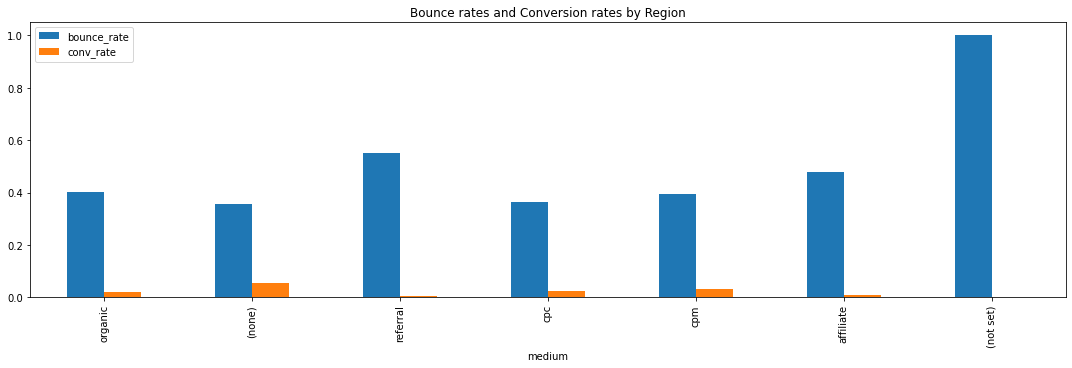

In [ ]:
Q5b[['bounce_rate','conv_rate']].plot(kind='bar',figsize=(15,5));
plt.tight_layout();
plt.title('Bounce rates and Conversion rates by Region');

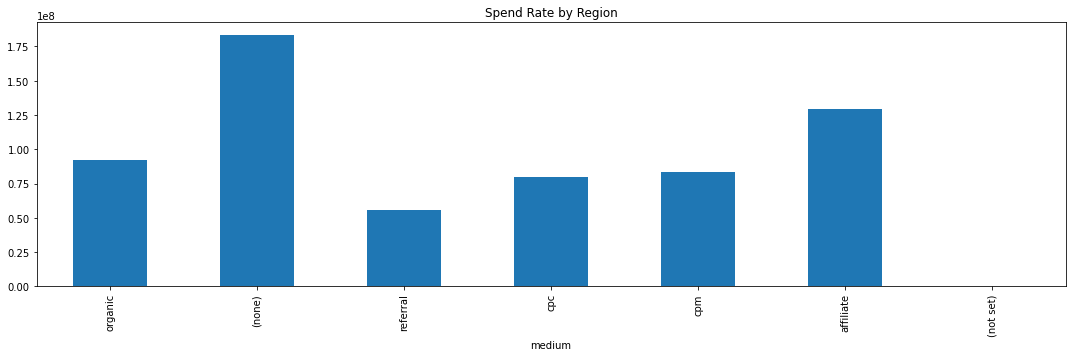

In [ ]:
Q5b.spend_rate.plot(kind='bar',figsize=(15,5));
plt.tight_layout()
plt.title('Spend Rate by Region');

Q5 Ans:


1.   58 different sources, but only 3 of them contribute to significant traffic, 2 of which are organic sources. Affiliate medium has higher spend rate compared to organic and hence has good opporutnity to drive incremental bookings
2.   Virginia has significantly high spend rate compared to other regions.

